In [1]:
from imageVAE import *
from dataset_helper import *
import os
import matplotlib.pyplot as plt

In [32]:
vae = ImageVAE((128,128,3),[32,64,64],[64,64,32],latent_dim=100,stride=2)


(128, 128, 3)
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 64, 64, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 64)   18432       conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 16, 16, 64)   36864       conv2d_11[0][0]                  
______________________________________________________________________________

In [33]:
vae.load_weights("../models/abstract_vae_100_2")

In [24]:
names = ["../data/abstract_images/" + x for x in os.listdir("../data/abstract_images/") if ".jpg" in x][:20000]

In [25]:
tensor = getTrainingTensor(names)

tensor = tensor.astype("float32") / 255

In [34]:
latentReg = vae.encoder.predict(tensor)

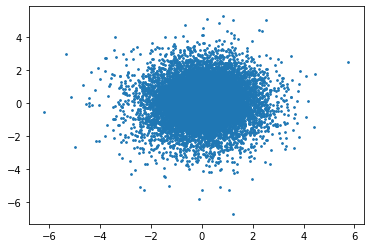

In [35]:
plt.scatter(latentReg[0][:,0],latentReg[0][:,1],s=3)


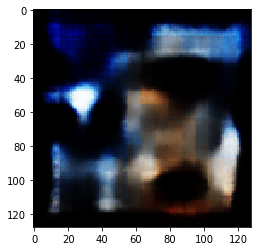

In [48]:
image = vae.decoder.predict(np.array([np.random.normal(0,4,100)]))[0]
plt.imshow(image)

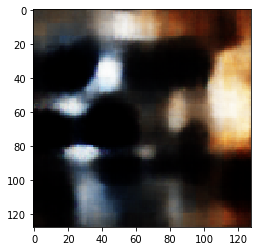

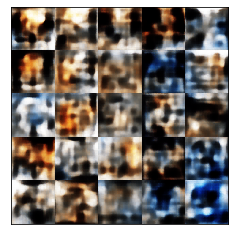

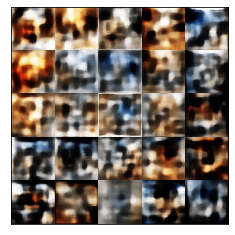

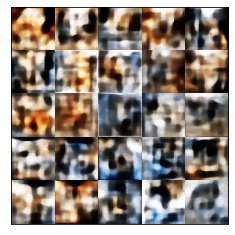

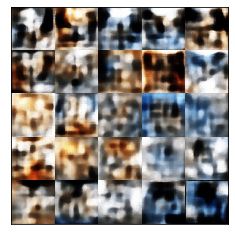

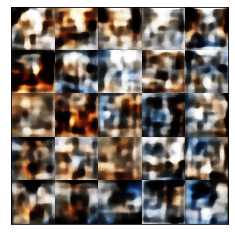

In [49]:
n = 5
digit_size = 128

for slice in range(5):
    figure = np.zeros((digit_size * n, digit_size * n,3))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(min(latentReg[0][:,0]), max(latentReg[0][:,0]), n)
    grid_y = np.linspace(min(latentReg[0][:,1]), max(latentReg[0][:,1]), n)

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi] + list(np.random.normal(0,1,98))])
            x_decoded = vae.decoder.predict(z_sample)[0]

            #digit = x_decoded[0].reshape(digit_size, digit_size, 3)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
                :
            ] = x_decoded
    plt.figure()
    plt.imshow(figure)
    plt.xticks([])
    plt.yticks([])
    figure = figure * 255
    Image.fromarray(figure.astype(np.uint8)).save("../data/generated_abstract_images/abstract_collection50_slice.jpg")